In [95]:
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


matplotlib.rcParams['axes.labelsize'] = 25
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 17
matplotlib.rcParams['text.color'] = 'k'

In [96]:
df = pd.read_csv('Forecast3.csv', index_col=[0])


In [65]:
print(df.shape)
print(df.columns)
print(type(df.index))

(36, 10)
Index(['Mexico', 'Argentina', 'Chile', 'Other Conosur (Bol/Per/Uru)', 'Brazil',
       'Colombia', 'Ecuador', 'Peru', 'Venezuela(Bol.R)', 'Caribe'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


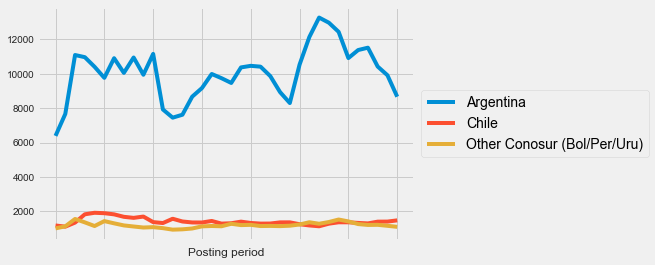

In [66]:

conosur = df[['Argentina', 'Chile','Other Conosur (Bol/Per/Uru)']]
conosur.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

          Colombia      Ecuador         Peru  Venezuela(Bol.R)
count    36.000000    36.000000    36.000000         36.000000
mean   5119.655376  2798.527734  1567.194152        308.852651
std    1347.831280   750.599217   574.645731       1558.656280
min     914.032217   744.999991   654.000002      -7490.000002
25%    4591.769824  2398.499997  1311.298249         78.250002
50%    5139.343838  2763.499982  1542.500014        127.000005
75%    5934.678826  3122.999997  1790.000008        467.686503
max    8193.543155  4763.000685  3534.937167       3058.999994


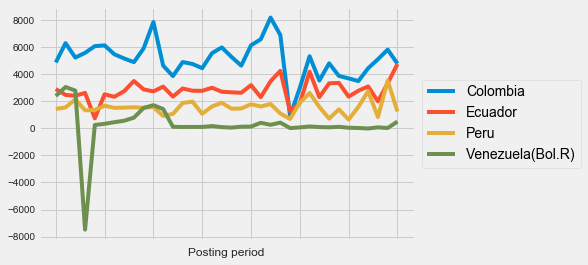

In [67]:
andean = df[['Colombia', 'Ecuador', 'Peru','Venezuela(Bol.R)']]
#print(andean)
print(andean.describe())
andean.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

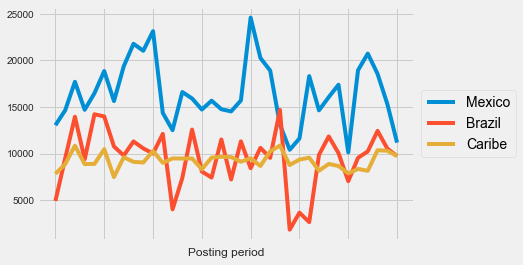

In [50]:
mexico = df['Mexico']
brazil = df['Brazil']
caribe = df['Caribe']
mexico.plot(legend=True)
brazil.plot(legend=True)
caribe.plot(legend=True)
latam = df[['Mexico', 'Argentina', 'Chile',
       'Other Conosur (Bol/Per/Uru)', 'Brazil', 'Colombia', 'Ecuador', 'Peru',
       'Venezuela(Bol.R)', 'Caribe']]
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Data Preprocessing


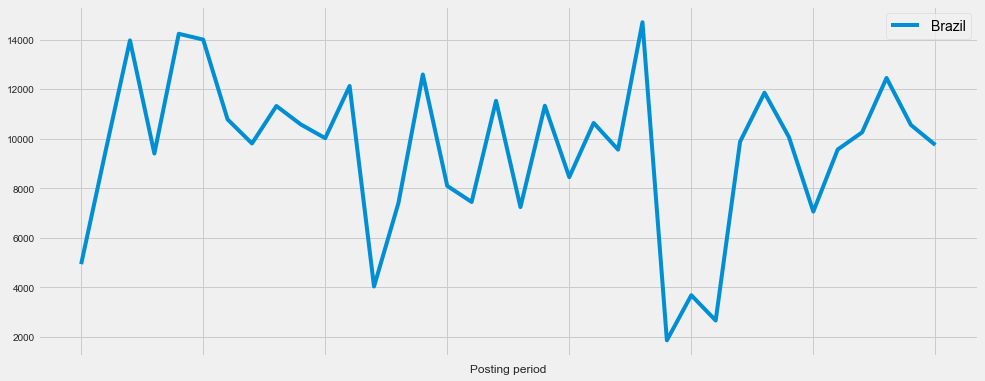

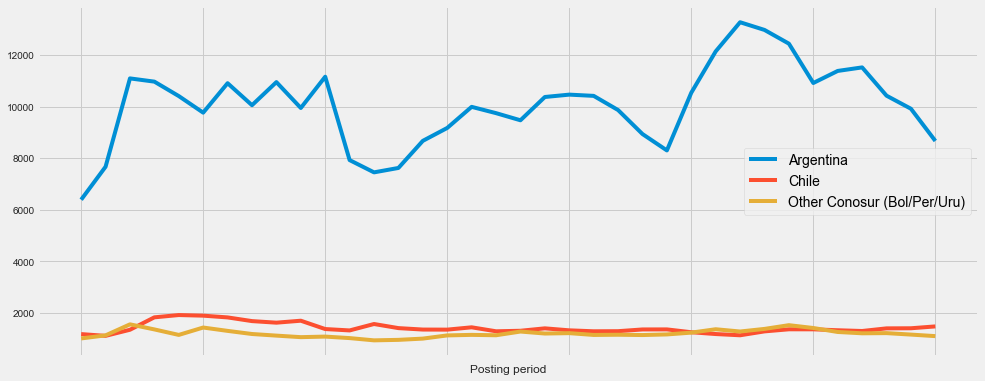

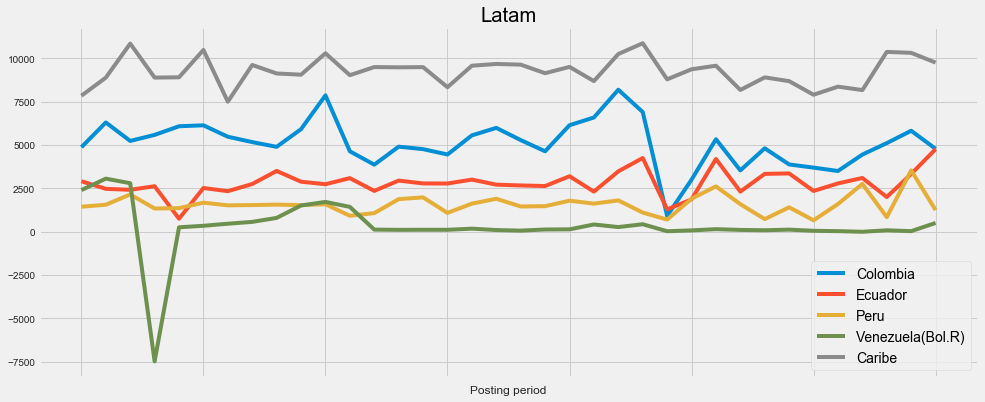

In [68]:
brazil.plot(figsize =(15, 6), legend = True)
conosur.plot(figsize =(15, 6), legend = True)
andean.plot (figsize=(15,6), legend = True)
caribe.plot(figsize=(15,6), legend = True)
plt.title('Latam')
plt.show()

# Decomposition

In [81]:
#df.plot(xticks=df.index, rot=65, legend=True)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_xticklabels(df[0])
#df.plot(xticks=df.index, rot=65, legend=True)
#plt.show()

y = df
#['Mexico', 'Argentina', 'Chile', 'Other Conosur (Bol/Per/Uru)', 'Brazil', 'Colombia', 'Ecuador', 'Peru','Venezuela(Bol.R)', 'Caribe']
#rcParams['figure.figsize'] = 18, 8

#'Mexico', 'Argentina', 'Chile', 'Other Conosur (Bol/Per/Uru)', 
#'Brazil', 'Colombia', 'Ecuador', 'Peru','Venezuela(Bol.R)', 'Caribe'


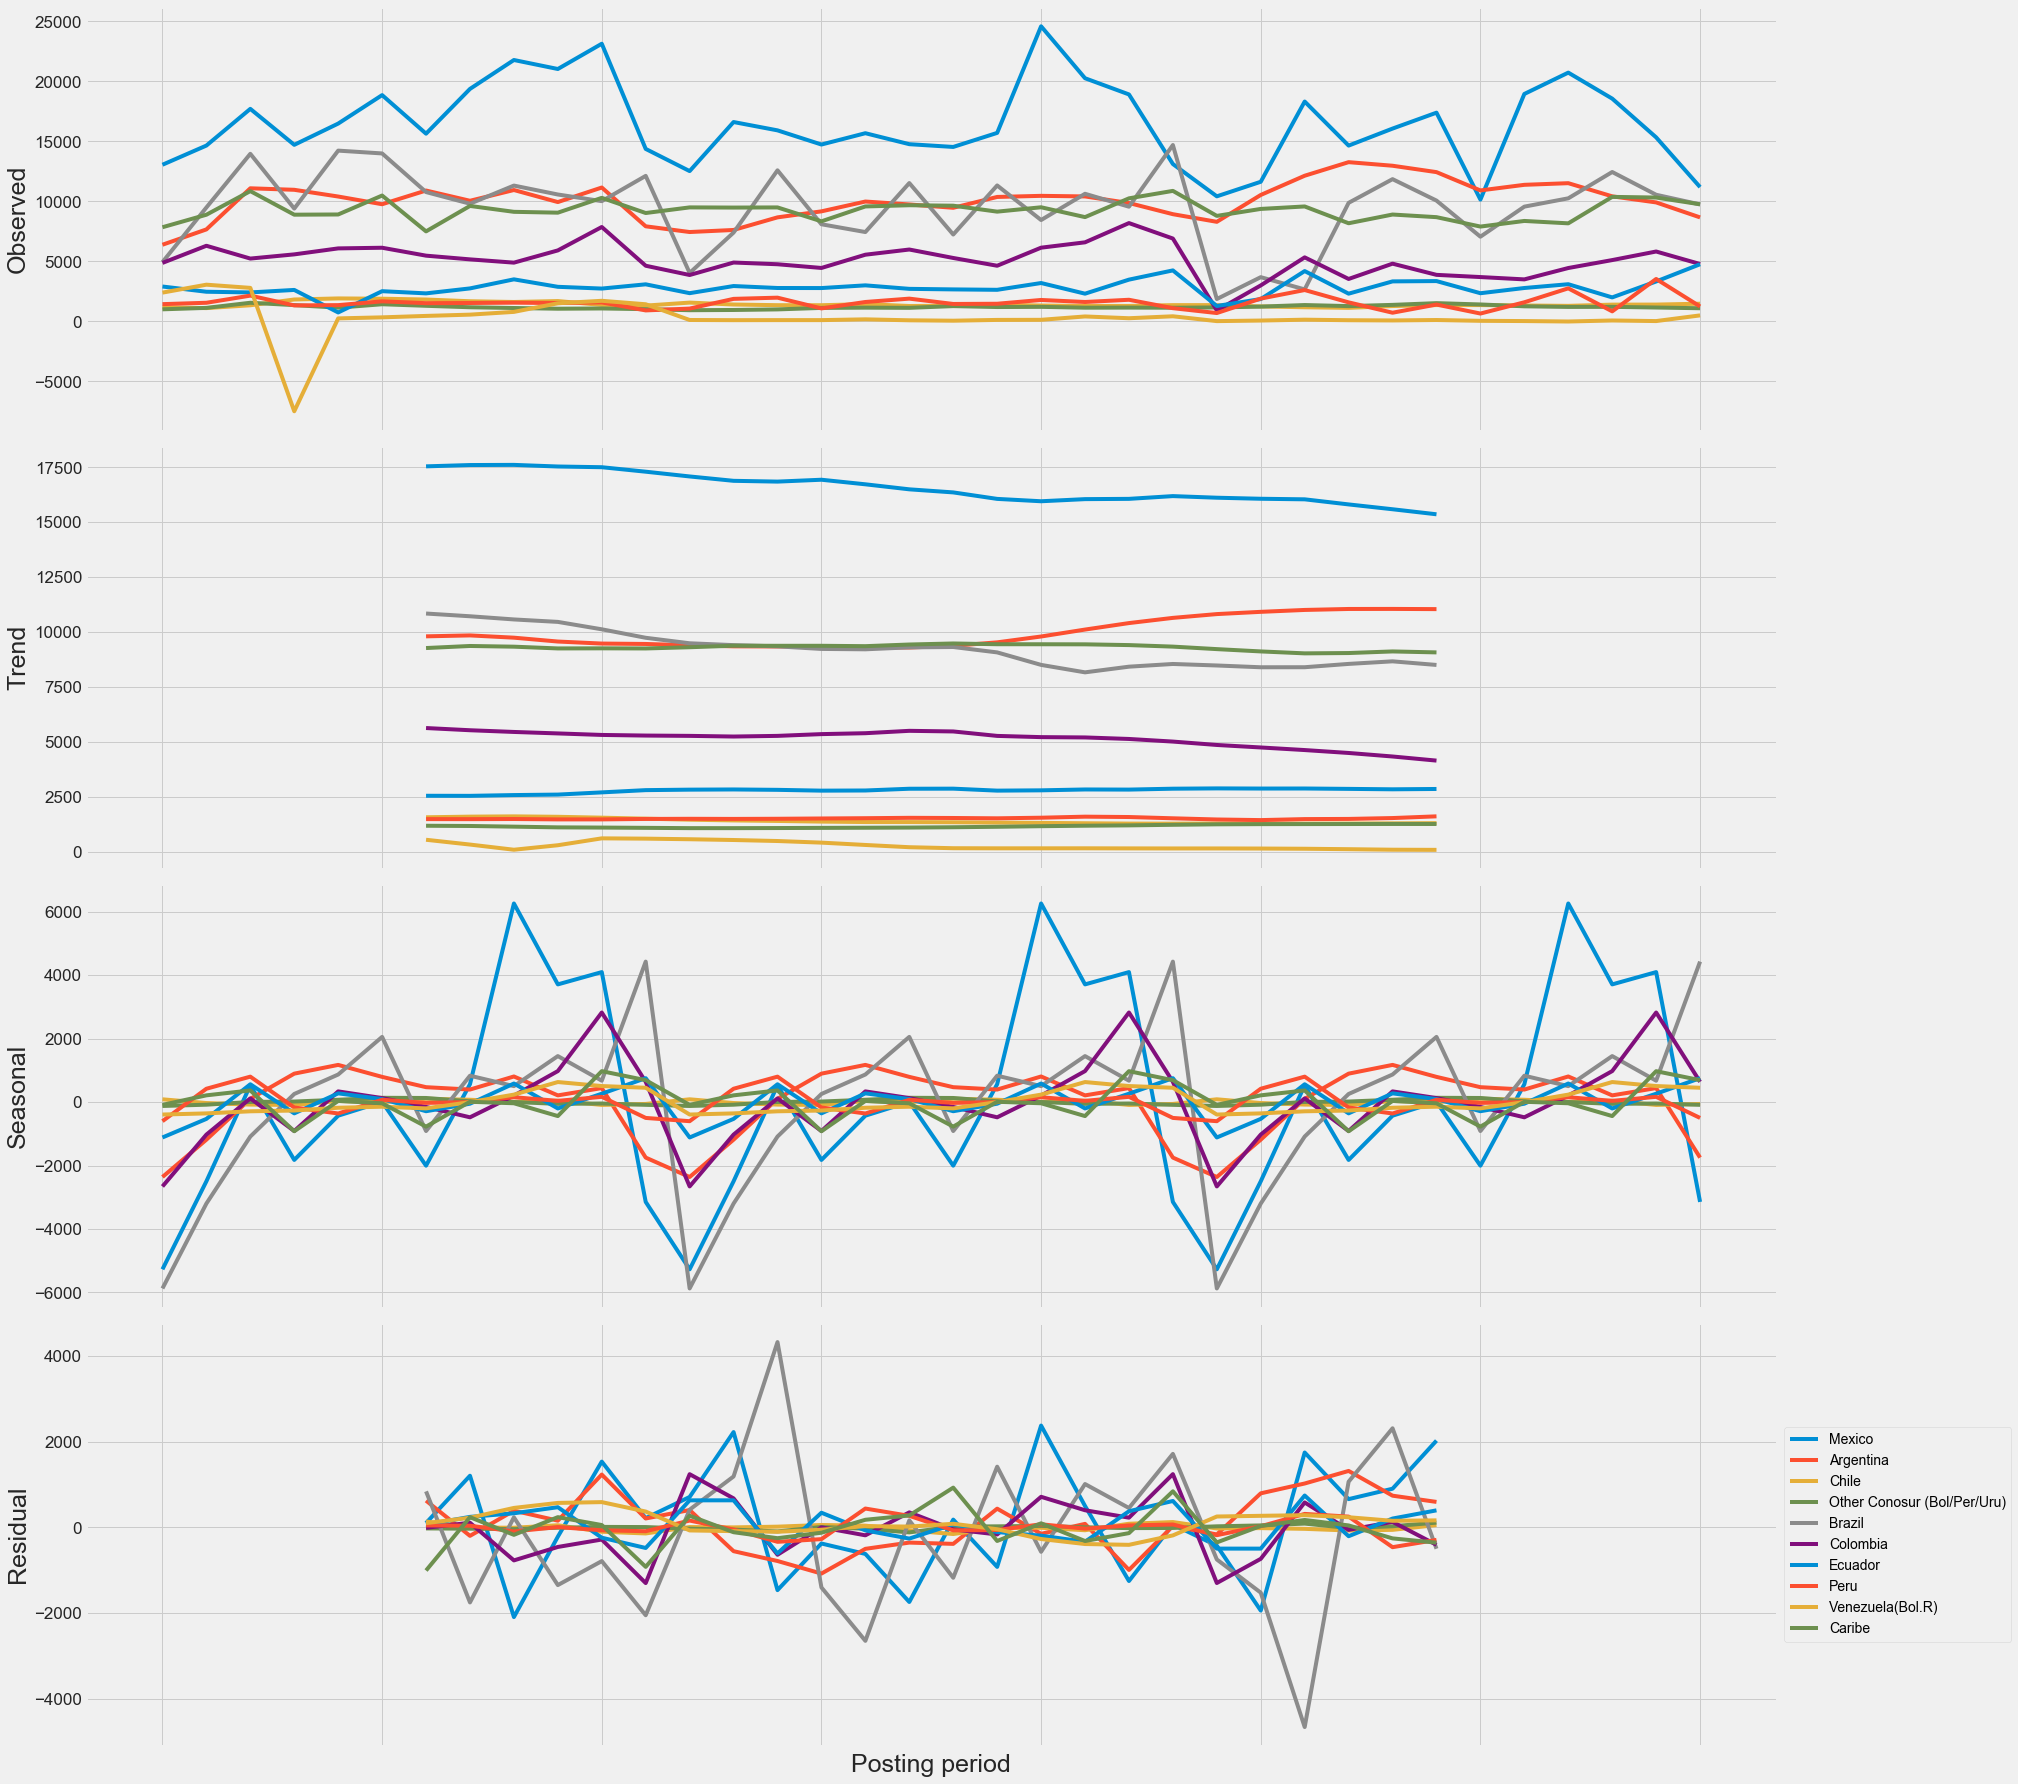

In [98]:
from pylab import rcParams
rcParams['figure.figsize'] = 25, 25
decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=12)
fig = decomposition.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#decomposition = sm.tsa.seasonal_decompose(y, model='additive', freq=12)
#print(type(decomposition))

#ax = decomposition.plot(xticks=df.index, rot=65, legend=True)
#ax.set_xticklabels(df['Posting period'])
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))





In [99]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [110]:
y = df['Mexico']
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal, enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:782.7090091967996
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:431.4542331243137
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:445.2415061981367
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:229.06768589511523
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:739.0247574647266
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:415.24129265499414
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:446.7275262941341
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:231.06534428101656
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:661.8150280783466
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:430.0871281697508
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:446.4845886268182
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:212.4209965325799
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:641.3186637354908
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:401.22375393988585
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:442.457736306559
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:213.2186400894111
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:681.8193208670777
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:433.3106006726817
ARIMA(1

The above output suggests that ARIMA(1, 1, 1)x(1, 1, 0, 12)12 yields the lowest AIC value of AIC:191.73310695372575. Therefore we should consider this to be optimal option.

# Fitting the ARIMA model

In [124]:
mod = sm.tsa.statespace.SARIMAX(y,order=(1, 1, 1), seasonal_order=(1, 1, 0, 12),enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4564      0.955     -0.478      0.633      -2.329       1.416
ma.L1         -0.5940      1.006     -0.590      0.555      -2.566       1.378
ar.S.L12      -0.4208      1.007     -0.418      0.676      -2.394       1.553
sigma2      8.572e+06   9.83e+06      0.872      0.383   -1.07e+07    2.78e+07


ValueError: operands could not be broadcast together with shapes (9,) (8,) (9,) 

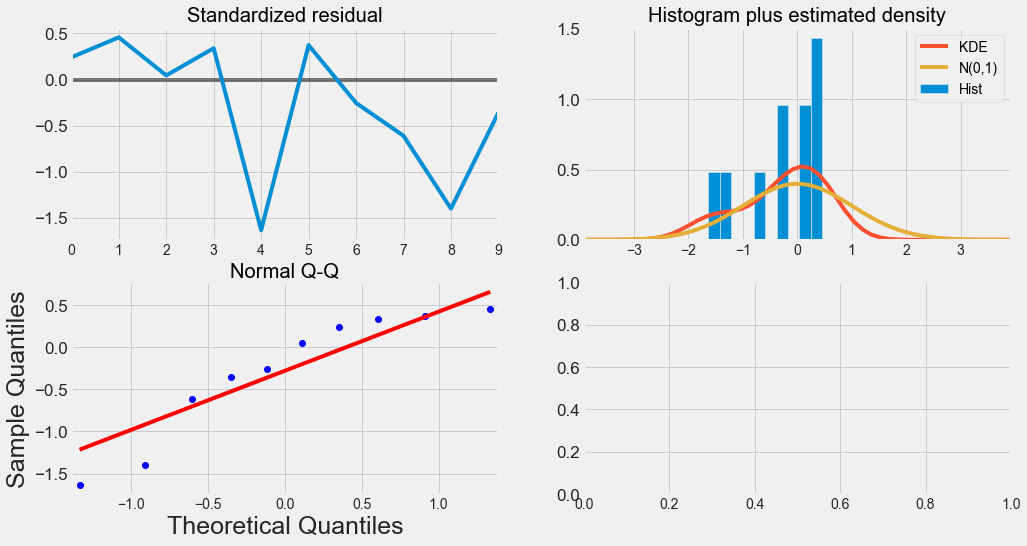

In [125]:
results.plot_diagnostics(figsize=(15,8))
plt.show()